In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [4]:
df = pd.read_csv('in_case.csv')

In [43]:
df = pd.read_csv('in_case2.csv')

In [44]:
df

,Unnamed: 0,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property
0,0,18477,15,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",0,28.0,One primary only,1.0,0.0,NaN
1,1,70400,14,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",0,17.0,One primary only,1.0,0.0,NaN
2,2,81204,18,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",1,323.0,One primary only,1.0,0.0,NaN
3,3,82818,19,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",1,457.0,One primary only,1.0,0.0,NaN
4,4,106645,14,White,Female,1979,Bones and Joints,Localized,Surgery performed,1,460.0,1st of 2 or more primaries,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,2321,75706668,9,White,Male,2016,Bones and Joints,Regional,Surgery performed,1,18.0,2nd of 2 or more primaries,2.0,0.0,"$45,000 - $49,999"
2322,2322,75745390,8,NaN,Female,2015,Soft Tissue including Heart,Localized,Not recommended,1,28.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2323,2323,75754218,2,White,Female,2016,Bones and Joints,Localized,Not recommended,1,12.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2324,2324,75801079,7,White,Female,2017,Bones and Joints,Localized,Surgery performed,1,5.0,One primary only,1.0,0.0,"$55,000 - $59,999"


In [45]:
df = df.drop('Unnamed: 0', axis = 1)

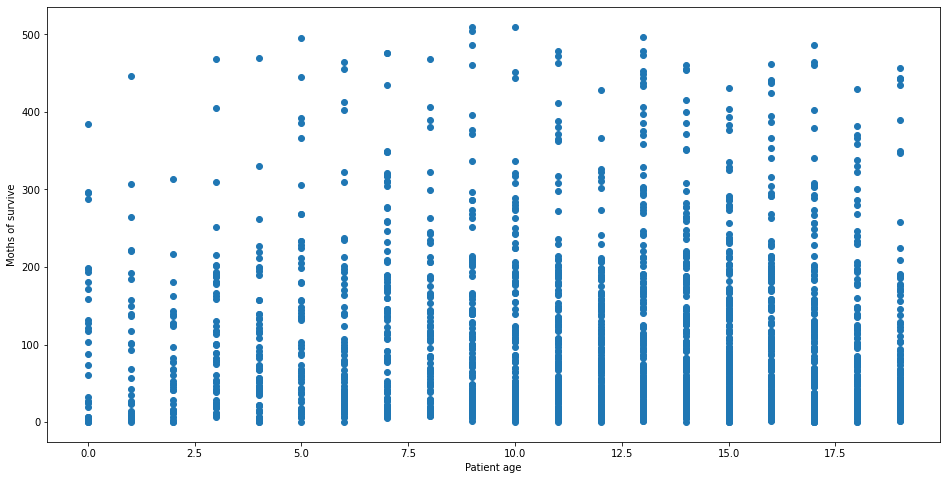

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['age'], df['months'])
ax.set_xlabel('Patient age')
ax.set_ylabel('Moths of survive')
plt.show()

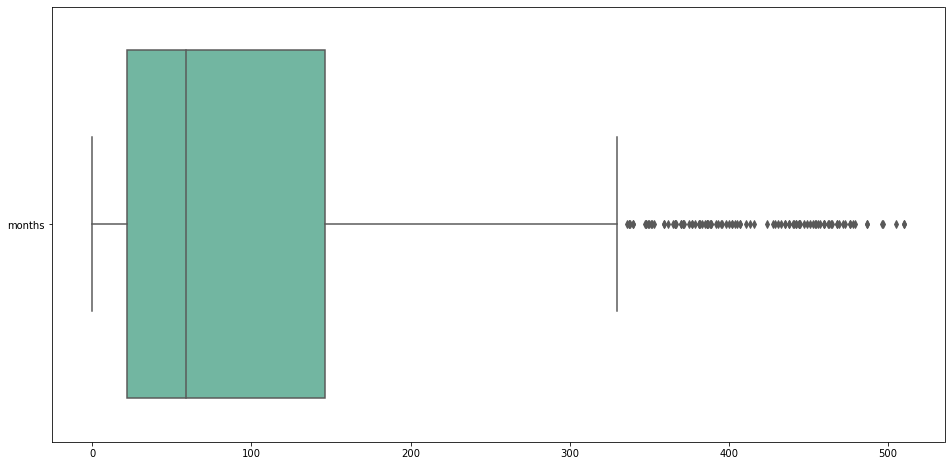

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df[['months']], orient="h", palette="Set2")

In [46]:
temp = df

In [25]:
temp_dict = {
    'Dead' : 0,
    'Alive' : 1
}

temp['status'] = temp['status'].map(temp_dict)

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2326 non-null   int64  
 1   age            2326 non-null   int64  
 2   race           2316 non-null   object 
 3   sex            2326 non-null   object 
 4   diagnosed      2326 non-null   int64  
 5   site           2326 non-null   object 
 6   stage          2326 non-null   object 
 7   surgery        2326 non-null   object 
 8   status         2326 non-null   int64  
 9   months         2323 non-null   float64
 10  sequence_num   2326 non-null   object 
 11  malignant_num  2326 non-null   float64
 12  benign_num     2326 non-null   float64
 13  property       1988 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 254.5+ KB


In [173]:
temp.to_csv('in_case2.csv')
temp.to_csv('in_case.csv')

In [64]:
df = temp

In [49]:
temp['surgery'].value_counts()

Surgery performed                                                               1396
Not recommended                                                                  641
Recommended but not performed, unknown reason                                    216
Unknown; death certificate; or autopsy only (2003+)                               42
Recommended, unknown if performed                                                 16
Not recommended, contraindicated due to other cond; autopsy only (1973-2002)       9
Recommended but not performed, patient refused                                     6
Name: surgery, dtype: int64

In [53]:
temp = temp.replace('Surgery performed', 'Yes')
temp = temp.replace('Not recommended','No')
temp = temp.replace('Recommended but not performed, unknown reason','No')
temp = temp.replace('Not recommended, contraindicated due to other cond; autopsy only (1973-2002)','No')
temp = temp.replace('Recommended but not performed, patient refused','No')
temp = temp.replace('Recommended, unknown if performed','Unknown')
temp = temp.replace('Unknown; death certificate; or autopsy only (2003+)','Unknown')

In [62]:
temp = temp.replace(np.nan,'Unknown')

In [63]:
temp.head()

,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property
0,18477,15,White,Male,1980,Bones and Joints,Regional,No,0,28,One primary only,1.0,0.0,Unknown
1,70400,14,White,Female,1977,Bones and Joints,Distant,No,0,17,One primary only,1.0,0.0,Unknown
2,81204,18,White,Male,1980,Bones and Joints,Localized,No,1,323,One primary only,1.0,0.0,Unknown
3,82818,19,White,Male,1979,Bones and Joints,Localized,No,1,457,One primary only,1.0,0.0,Unknown
4,106645,14,White,Female,1979,Bones and Joints,Localized,Yes,1,460,1st of 2 or more primaries,2.0,0.0,Unknown


In [56]:
temp['surgery'].value_counts()

Yes        1396
No          872
Unknown      58
Name: surgery, dtype: int64

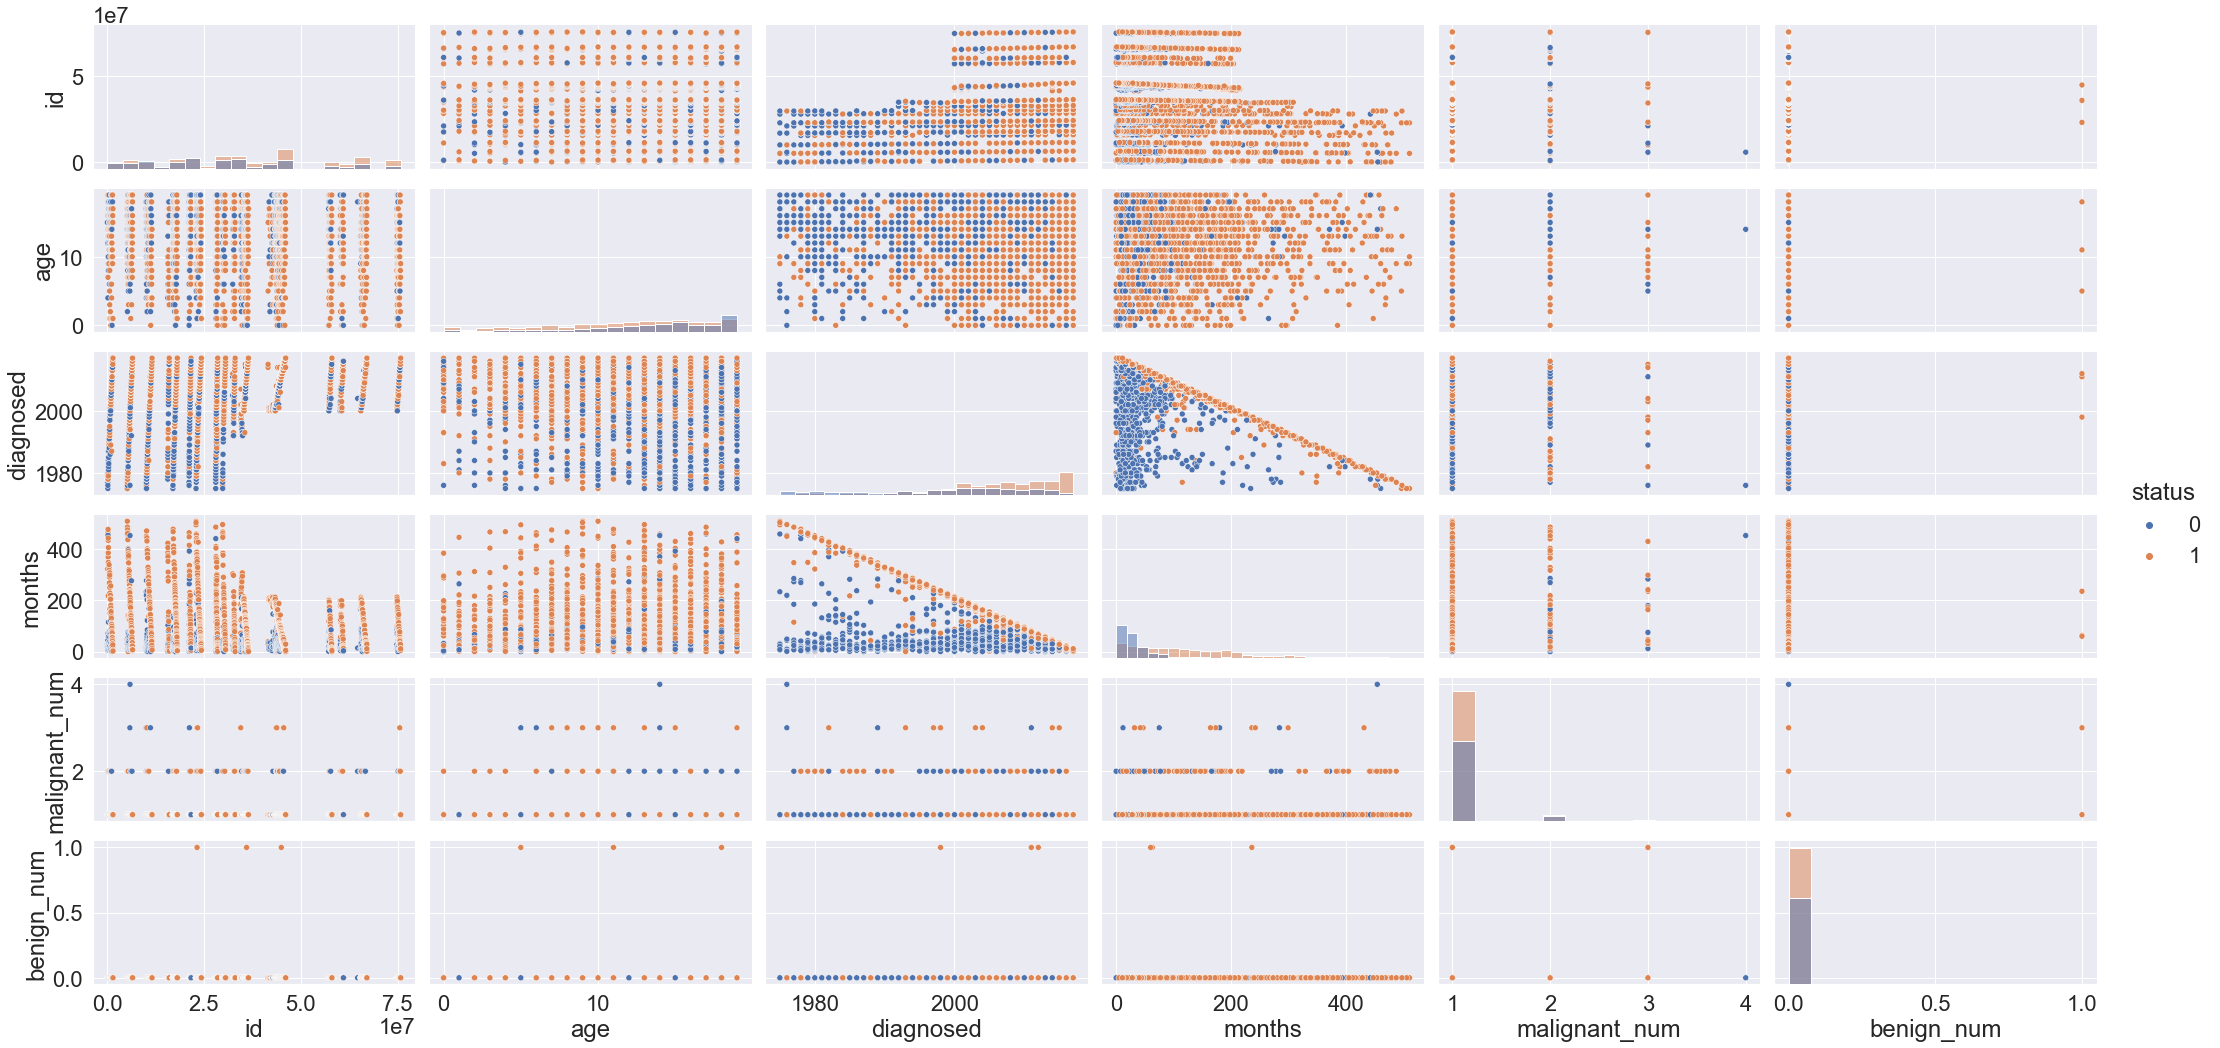

In [58]:
sns.set(font_scale=2)
sns.pairplot(df,hue="status", diag_kind="hist", aspect=2)

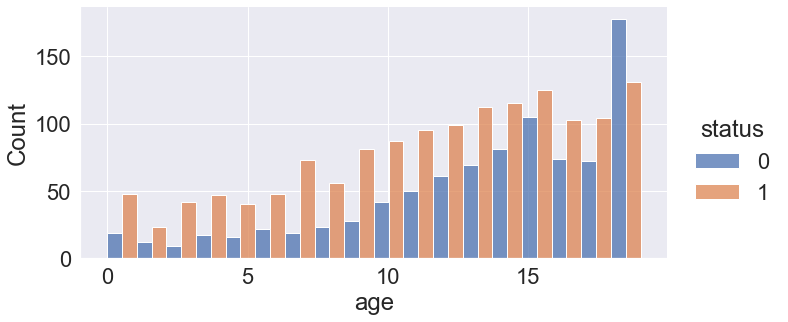

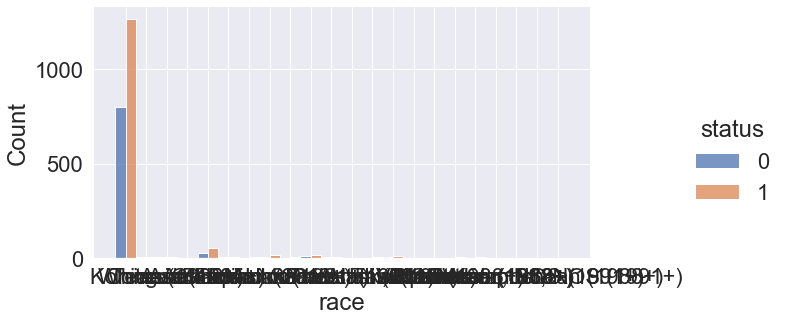

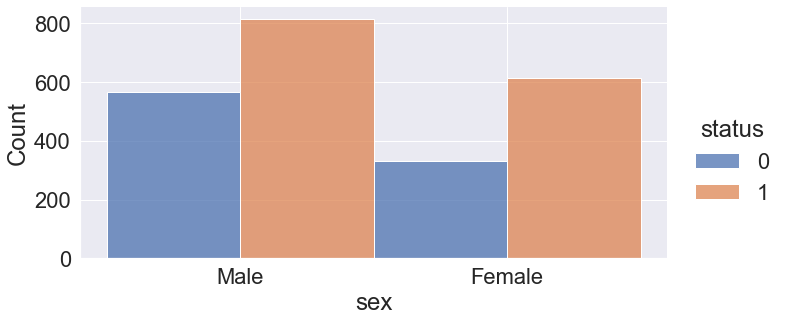

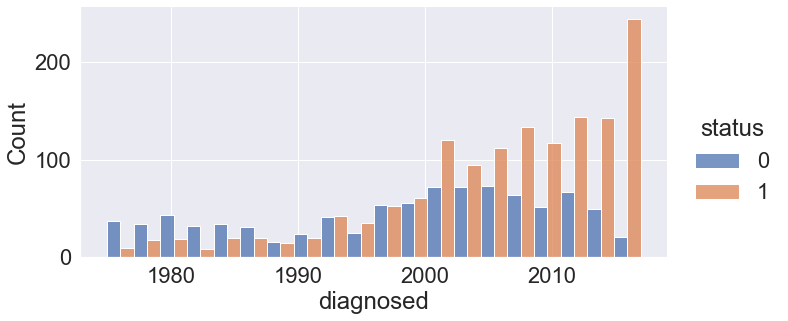

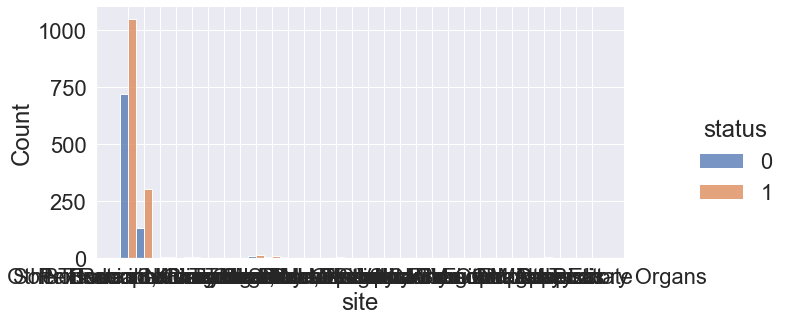

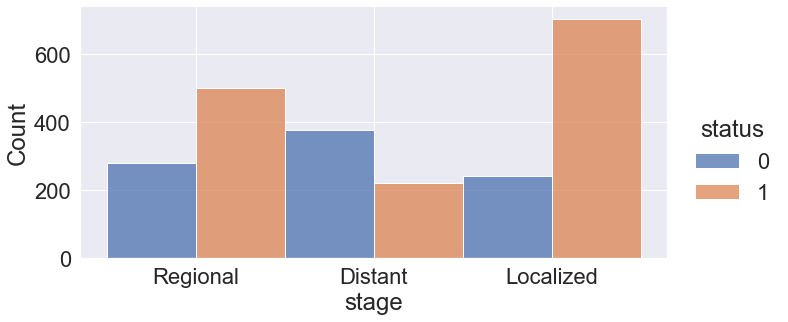

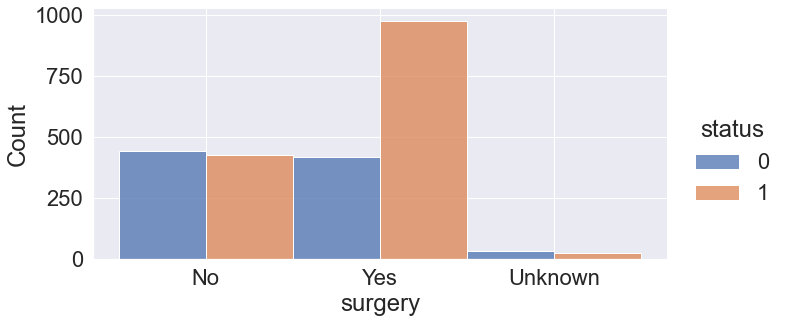

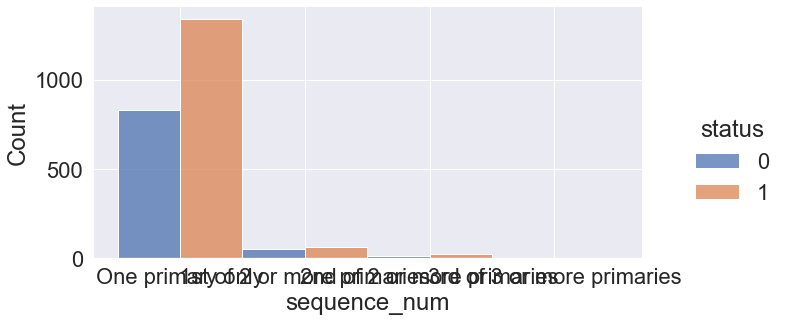

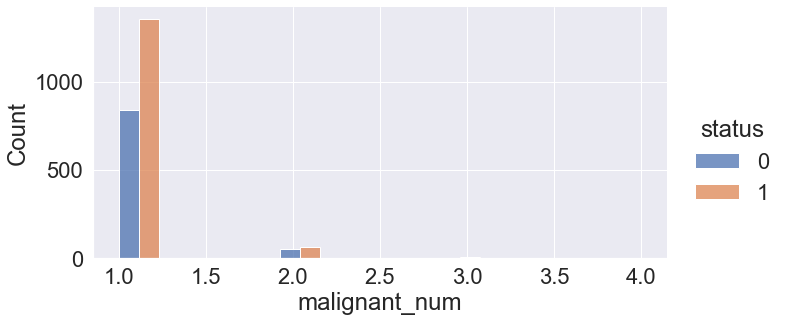

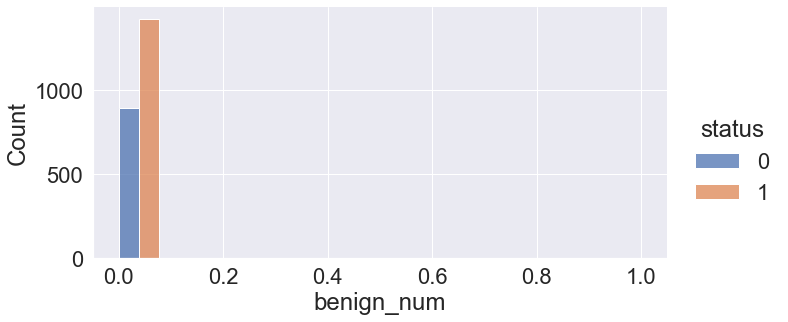

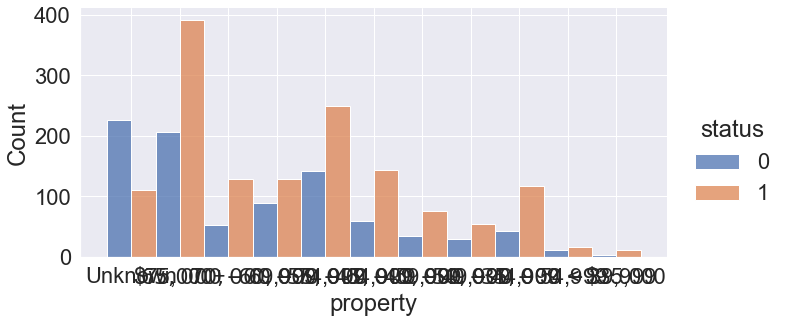

In [73]:
for column in ['age','race',
                            'sex','diagnosed',
                            'site','stage','surgery','sequence_num','malignant_num','benign_num','property']:
    sns.displot(df, x=column, hue="status", height=5, aspect=2, multiple="dodge")

In [82]:
temp['years'] = temp['months']
temp['years'] = temp['years'].replace('Uknown',np.nan)
temp

,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property,years
0,18477,15,White,Male,1980,Bones and Joints,Regional,No,0,28,One primary only,1.0,0.0,Unknown,28
1,70400,14,White,Female,1977,Bones and Joints,Distant,No,0,17,One primary only,1.0,0.0,Unknown,17
2,81204,18,White,Male,1980,Bones and Joints,Localized,No,1,323,One primary only,1.0,0.0,Unknown,323
3,82818,19,White,Male,1979,Bones and Joints,Localized,No,1,457,One primary only,1.0,0.0,Unknown,457
4,106645,14,White,Female,1979,Bones and Joints,Localized,Yes,1,460,1st of 2 or more primaries,2.0,0.0,Unknown,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,75706668,9,White,Male,2016,Bones and Joints,Regional,Yes,1,18,2nd of 2 or more primaries,2.0,0.0,"$45,000 - $49,999",18
2322,75745390,8,Unknown,Female,2015,Soft Tissue including Heart,Localized,No,1,28,One primary only,1.0,0.0,"$55,000 - $59,999",28
2323,75754218,2,White,Female,2016,Bones and Joints,Localized,No,1,12,One primary only,1.0,0.0,"$55,000 - $59,999",12
2324,75801079,7,White,Female,2017,Bones and Joints,Localized,Yes,1,5,One primary only,1.0,0.0,"$55,000 - $59,999",5


In [92]:
temp = df

In [93]:
temp = temp.replace('Unknown', np.nan)

In [96]:
temp['years'] = temp['years'].astype(float)
temp['months'] = temp['months'].astype(float)

In [97]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2326 non-null   int64  
 1   age            2326 non-null   int64  
 2   race           2316 non-null   object 
 3   sex            2326 non-null   object 
 4   diagnosed      2326 non-null   int64  
 5   site           2326 non-null   object 
 6   stage          2326 non-null   object 
 7   surgery        2268 non-null   object 
 8   status         2326 non-null   int64  
 9   months         2323 non-null   float64
 10  sequence_num   2326 non-null   object 
 11  malignant_num  2326 non-null   float64
 12  benign_num     2326 non-null   float64
 13  property       1988 non-null   object 
 14  years          2323 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 272.7+ KB


In [122]:
temp.loc[(temp['months'] >=0 ) & (temp['months'] <60), 'years'] = '0-5'
temp.loc[(temp['months'] >=60 ) & (temp['months'] <120), 'years'] = '5-10'
temp.loc[(temp['months'] >=120 ) & (temp['months'] <240), 'years'] = '10-20'
temp.loc[(temp['months'] >=240 ) , 'years'] = '20+'

In [123]:
temp['years'].value_counts()

0-5      1166
10-20     490
5-10      430
20+       237
Name: years, dtype: int64

In [124]:
temp['survive'] = temp['years']

In [127]:
temp.loc[(temp['years'] == '0-5' ) & (temp['status'] == 0), 'survive'] = 'dead in 5'
temp.loc[(temp['years'] == '0-5' ) & (temp['status'] == 1), 'survive'] = 'survive'
temp.loc[(temp['years'] == '5-10' ) & (temp['status'] == 0), 'survive'] = 'dead in 10'
temp.loc[(temp['years'] == '5-10' ) & (temp['status'] == 1), 'survive'] = 'survive'
temp.loc[(temp['years'] == '10-20' ) & (temp['status'] == 0), 'survive'] = 'dead in 20'
temp.loc[(temp['years'] == '10-20' ) & (temp['status'] == 1), 'survive'] = 'survive'
temp.loc[(temp['years'] == '20+' ) & (temp['status'] == 0), 'survive'] = 'dead in 20+'
temp.loc[(temp['years'] == '20+' ) & (temp['status'] == 1), 'survive'] = 'survive'


In [129]:
temp['survive'].value_counts()

survive        1429
dead in 5       745
dead in 10       91
dead in 20       41
dead in 20+      17
Name: survive, dtype: int64

In [116]:
temp.shape


(2326, 16)

In [120]:
745*100 / 2326

32.0292347377472

In [130]:
temp.to_csv('more_attribute.csv')

In [133]:
temp = temp.replace(np.nan, 'Uknown')

In [136]:
temp['stage'].value_counts()

Localized    947
Regional     781
Distant      598
Name: stage, dtype: int64

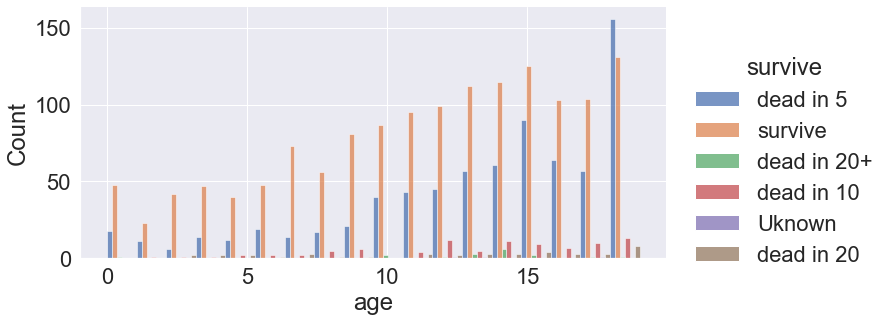

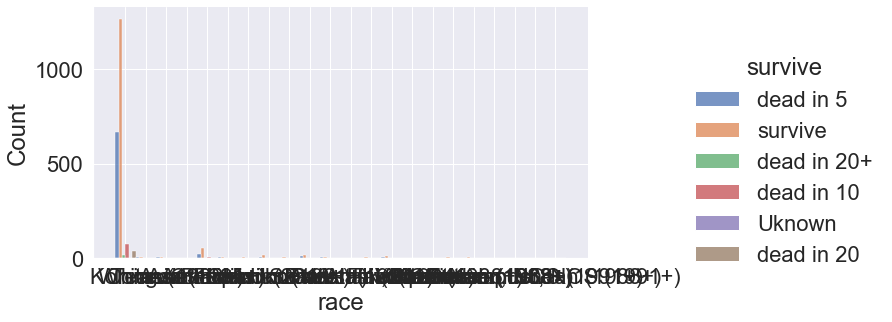

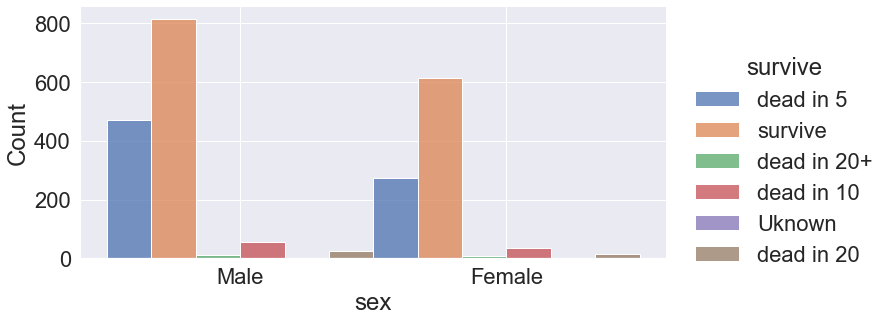

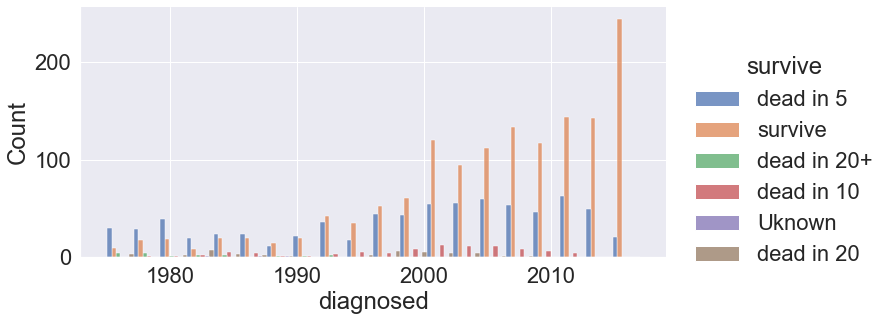

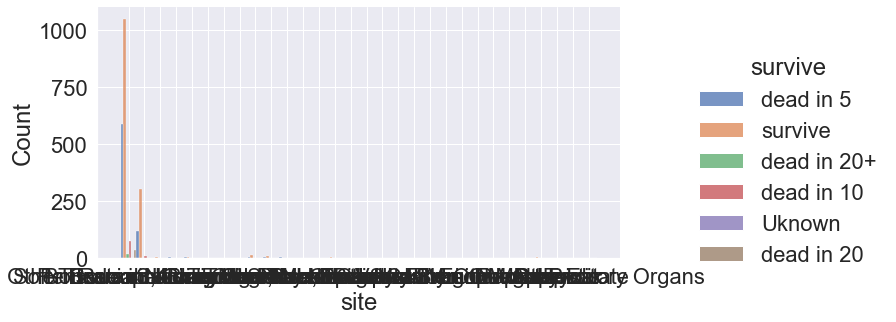

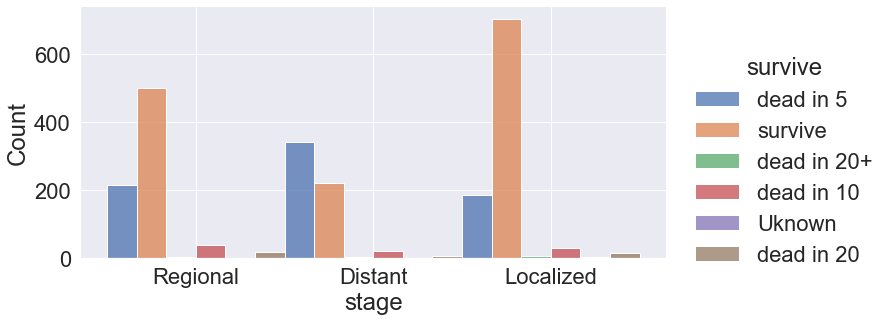

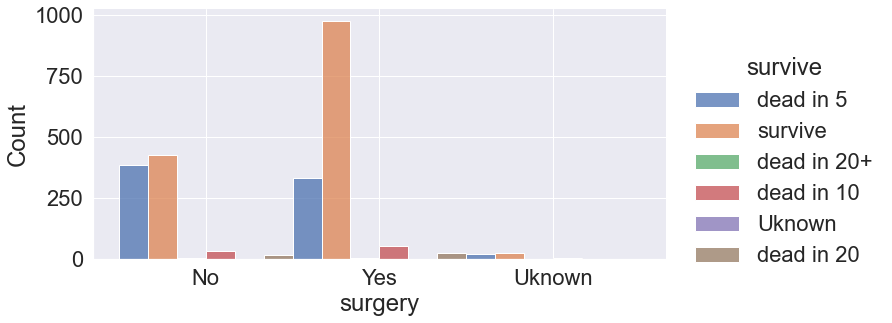

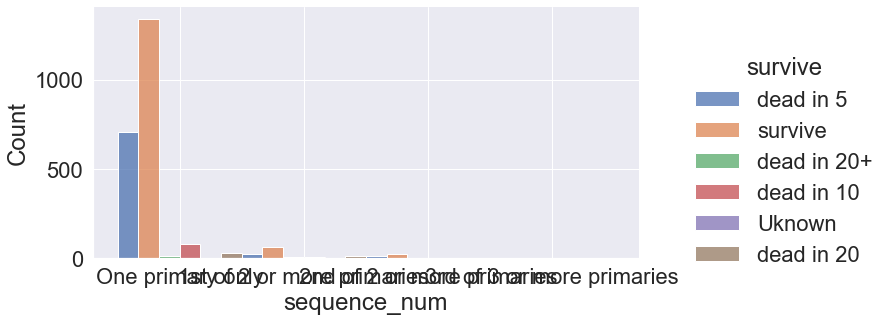

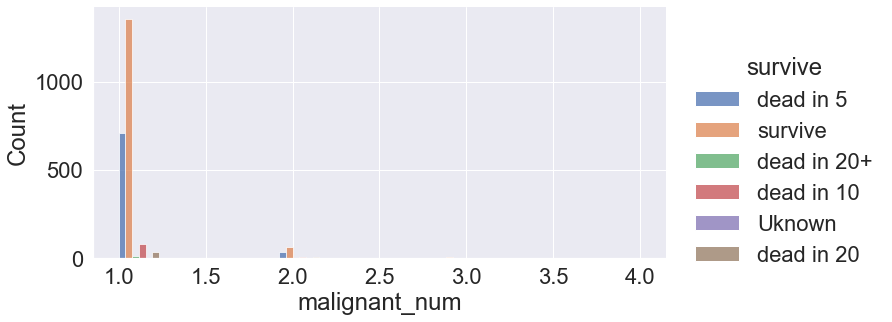

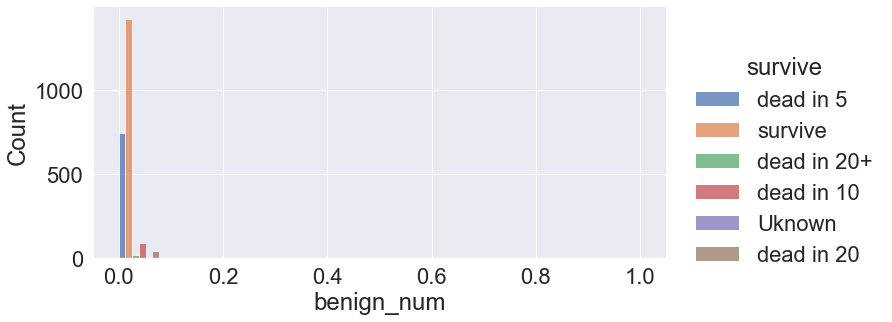

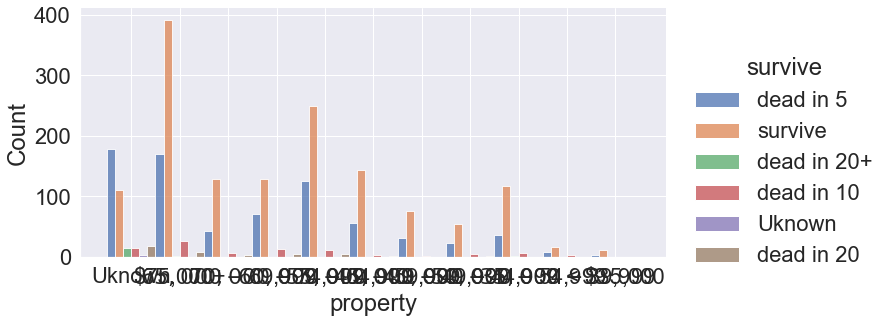

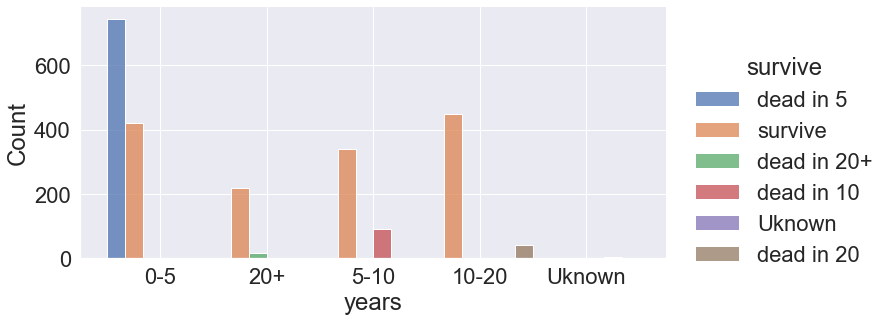

In [137]:
for column in ['age','race',
                            'sex','diagnosed',
                            'site','stage','surgery','sequence_num','malignant_num','benign_num','property', 'years']:
    sns.displot(temp, x=column, hue="survive", height=5, aspect=2, multiple="dodge")

In [138]:
temp['age'].value_counts()

15    230
14    196
13    181
16    177
17    176
18    162
12    160
19    147
11    145
10    129
9     109
7      92
8      79
6      70
4      64
5      56
3      51
2      35
0      35
1      32
Name: age, dtype: int64

In [141]:
pd.crosstab(temp['stage'], temp['survive'], normalize='index')

survive,Uknown,dead in 10,dead in 20,dead in 20+,dead in 5,survive
stage,,,,,,
Distant,0.000000,0.036789,0.010033,0.008361,0.573579,0.371237
Localized,0.003168,0.030623,0.016895,0.007392,0.197466,0.744456
Regional,0.000000,0.051216,0.024328,0.006402,0.275288,0.642766


In [142]:
pd.crosstab(temp['sex'], temp['survive'], normalize='index')

survive,Uknown,dead in 10,dead in 20,dead in 20+,dead in 5,survive
sex,,,,,,
Female,0.002119,0.036017,0.015890,0.007415,0.289195,0.649364
Male,0.000724,0.041245,0.018813,0.007236,0.341534,0.590449


In [151]:
pd.crosstab(temp['age'], temp['survive'], normalize='index')

survive,Uknown,dead in 10,dead in 20,dead in 20+,dead in 5,survive
age,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.342857,0.657143
1,0.000000,0.000000,0.000000,0.031250,0.187500,0.781250
2,0.000000,0.028571,0.000000,0.000000,0.314286,0.657143
3,0.000000,0.019608,0.039216,0.000000,0.117647,0.823529
4,0.000000,0.015625,0.031250,0.000000,0.218750,0.734375
5,0.000000,0.035714,0.035714,0.000000,0.214286,0.714286
6,0.000000,0.028571,0.014286,0.000000,0.271429,0.685714
7,0.000000,0.021739,0.032609,0.000000,0.152174,0.793478
8,0.000000,0.063291,0.012658,0.000000,0.215190,0.708861


In [148]:
pd.crosstab(temp['age'], temp['stage'], normalize='index')

stage,Distant,Localized,Regional
age,,,
0,0.257143,0.514286,0.228571
1,0.031250,0.500000,0.468750
2,0.257143,0.314286,0.428571
3,0.215686,0.431373,0.352941
4,0.234375,0.500000,0.265625
5,0.232143,0.410714,0.357143
6,0.271429,0.400000,0.328571
7,0.184783,0.456522,0.358696
8,0.202532,0.468354,0.329114


In [158]:
pd.crosstab(temp['malignant_num'], temp['survive'], normalize='index')

survive,Uknown,dead in 10,dead in 20,dead in 20+,dead in 5,survive
malignant_num,,,,,,
1.0,0.001365,0.037324,0.015931,0.005007,0.323168,0.617205
2.0,0.000000,0.070175,0.043860,0.035088,0.298246,0.552632
3.0,0.000000,0.071429,0.071429,0.071429,0.071429,0.714286
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [159]:
temp['malignant_num'].value_counts()

1.0    2197
2.0     114
3.0      14
4.0       1
Name: malignant_num, dtype: int64

In [161]:
pd.crosstab(temp['benign_num'], temp['survive'], normalize='index')

survive,Uknown,dead in 10,dead in 20,dead in 20+,dead in 5,survive
benign_num,,,,,,
0.0,0.001291,0.039173,0.01765,0.007318,0.320706,0.613861
1.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000


In [164]:
df=temp

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


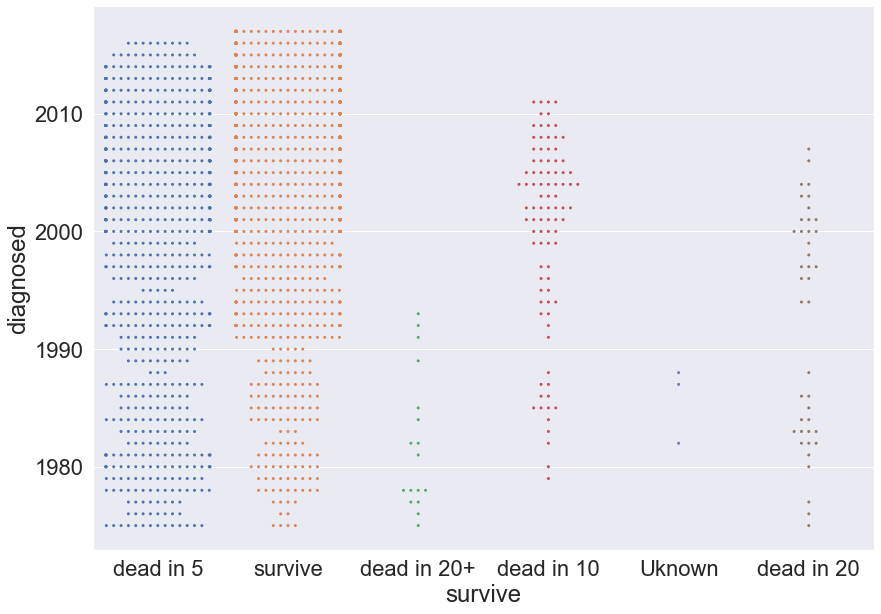

In [172]:
g = sns.swarmplot(x="survive", y="diagnosed", data=df, size = 3)
sns.despine()
g.figure.set_size_inches(14,10)

In [174]:
temp['survive'].value_counts()

survive        1429
dead in 5       745
dead in 10       91
dead in 20       41
dead in 20+      17
Uknown            3
Name: survive, dtype: int64